# [KDT] ch2 기초 통계

In [1]:
# !pip install seaborn
# !pip install matplotlib
# !pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.__version__

'1.5.3'

## 통계량

In [4]:
# np.arange(10)
array10 = np.arange(10)
array10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# mean
np.mean(array10)

4.5

In [6]:
# array [8,8,8,8,8,8,8,8,8] 
array8 = [8,8,8,8,8,8,8,8,8]

In [7]:
# np.arange(10)통계량
print(np.median(array10))
print(np.std(array10))

4.5
2.8722813232690143


In [8]:
# array [8,8,8,8,8,8,8,8,8]  통계량
print(np.mean(array8))
print(np.median(array8))
print(np.std(array8))   # 표준편차

8.0
8.0
0.0


In [9]:
from scipy.stats import mode
mode(array10)

ModeResult(mode=array([0]), count=array([1]))

In [10]:
# mod
mode(array8)

ModeResult(mode=array([8]), count=array([9]))

In [11]:
# 데이터 값(sclae)이 커질때 평균과 분산의 변화
arr2 = np.arange(10,110,10)
arr2
np.mean(arr2), np.var(arr2), np.std(arr2)

(55.0, 825.0, 28.722813232690143)

In [12]:
# arr2 * 10
arr20 = arr2 * 10
arr20
np.mean(arr20), np.var(arr20), np.std(arr20)

(550.0, 82500.0, 287.22813232690146)

<AxesSubplot: ylabel='Frequency'>

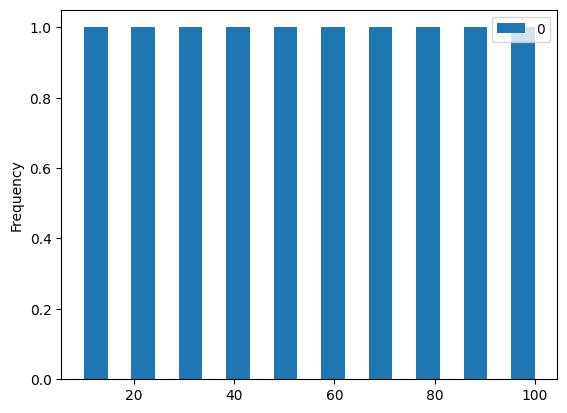

In [13]:
pd.DataFrame(arr2).plot.hist(bins = 19)

<AxesSubplot: ylabel='Frequency'>

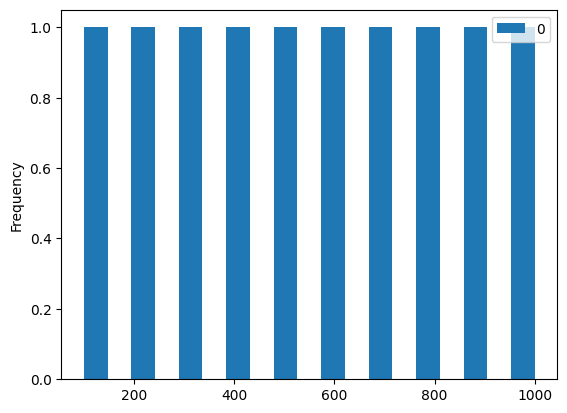

In [14]:
pd.DataFrame(arr20).plot.hist(bins = 19)

## Quiz

data(hk_221206.csv)를 읽고 

1) height column에 대한
- 평균 (mean)
- 중앙값 (mean)
- 최빈값 (mode)
- 1사분위수, 2사분위수, 3사분위수, IQR
- 첨도
- 왜도를 구하시오

2) age column에 대한
- 평균 (mean)
- 중앙값 (mean)
- 최대값 (max)를 구하시오

In [15]:
# 파일 로딩 
df_hk = pd.read_csv('.\\data\\hk_221206.csv')
df_hk

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015
...,...,...,...,...,...,...,...,...,...,...
245,hkd95,730710-2,F,157.8,50,A,A,A,6990,4865
246,hkd96,720805-2,F,150.4,51,O,A,A,7110,4985
247,hkd97,710929-1,M,172.4,52,A,A,B,8000,6625
248,hkd98,701024-1,M,166.7,53,O,A,B,8760,7385


In [16]:
# 변수 type 확인
df_hk.dtypes

name            object
jumin7          object
gender          object
height         float64
age              int64
blood_type      object
company         object
grades          object
salary           int64
expenditure      int64
dtype: object

In [17]:
# 1) height column에 대한 통계량
from scipy.stats import mode
df_hk['height'].mean()
df_hk['height'].median()
df_hk['height'].mode()  # 수치형 data에는 사용 안함, 주로 명목형 변수에 사용
df_hk['height'].std()
df_hk['height'].var()
df_hk['height'].quantile([0.25, 0.5, 0.75])
df_hk['height'].skew()
df_hk['height'].kurt()

-1.1083106956455488

In [18]:
# 2) age column에 대한
print(df_hk['age'].agg(['mean', 'median', 'max']))

mean      39.24
median    39.00
max       55.00
Name: age, dtype: float64


<AxesSubplot: xlabel='age', ylabel='Density'>

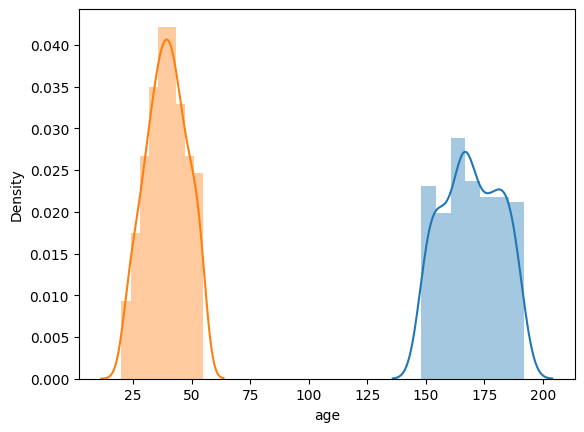

In [19]:
# 그래프 (분포)
sns.distplot(df_hk['height'])
sns.distplot(df_hk['age'])

<AxesSubplot: >

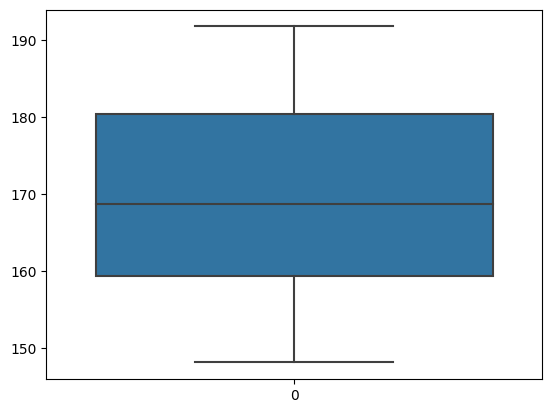

In [20]:
# Grouped boxplots by seaborn
sns.boxplot(df_hk['height'])

<AxesSubplot: xlabel='company', ylabel='height'>

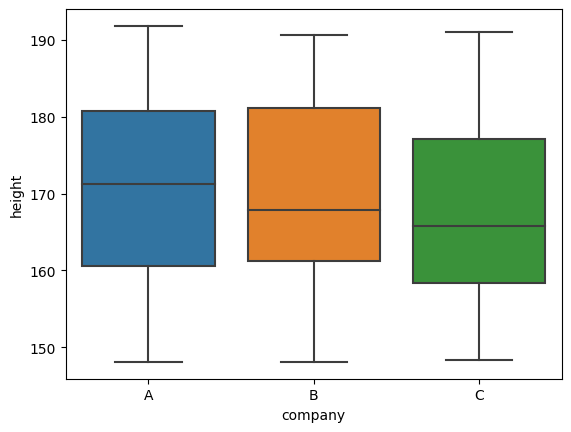

In [21]:
# Grouped boxplots by seaborn
sns.boxplot(x='company', 
            y='height', 
            data=df_hk)

## 조건부확률

df_hk에서 

1) 1명을 선택했을때 Gender 가 Female 이었다. company가 'A'일 확률은 ?

In [22]:
# 파일 로딩
df_hk = pd.read_csv('.\\data\\hk_221015.csv')
df_hk[:5]

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS


In [23]:
# crosstab 
pd.crosstab(df_hk['gender'], df_hk['company'])

company,A,B,C
gender,,,
F,40,47,25
M,60,53,25


In [24]:
# 조건부 확률
40/(40+47+25)

0.35714285714285715

## 중심극한정리

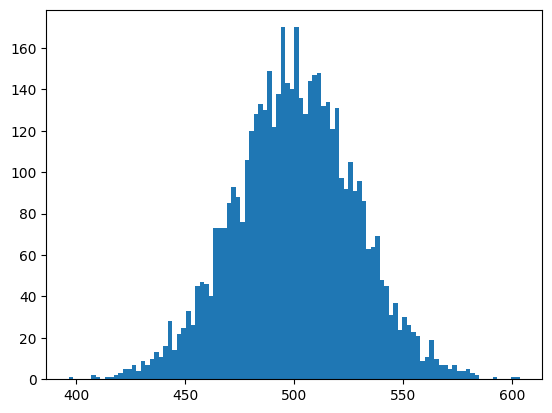

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random

avg_values = []
for i in range (1,5000): # 횟수를 증가시키면 정규분포로 변화
  random_sample = random.sample(range(1, 1000),100)
  x = np.mean(random_sample)
  avg_values.append(x)

plt.hist(avg_values, bins = 100)
plt.show()

# Chart 기본

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

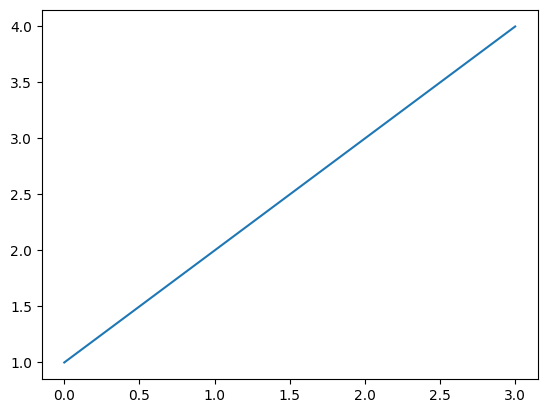

In [27]:
# matplotlib inline
plt.plot([0, 1, 2, 3],[1, 2, 3, 4])
plt.show()

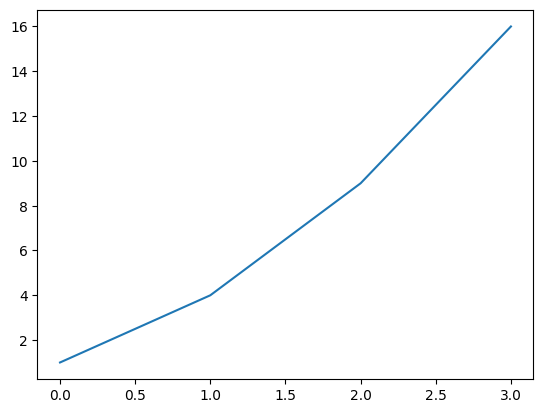

In [28]:
# x, y값 변경
plt.plot([0, 1, 2, 3],[1, 4, 9, 16])
plt.show()

## Figure와 Axes 

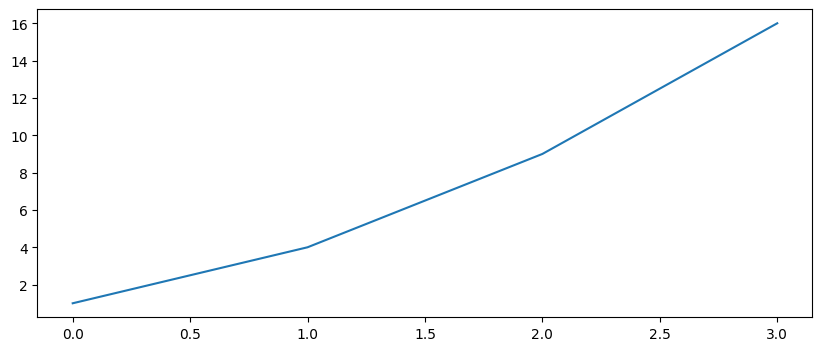

In [29]:
# plt.figure()는 figure의 속성을 정의, figure는 canvas 역할
plt.figure(figsize = (10, 4))
plt.plot([0, 1, 2, 3],[1, 4, 9, 16])
plt.show()

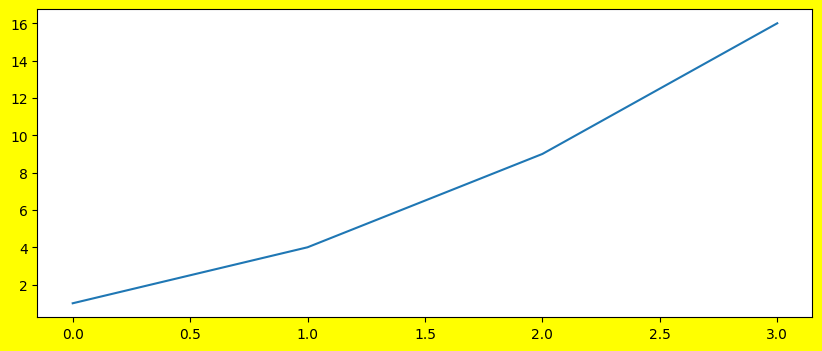

In [30]:
# figrue속성으로 firgure 바탕 색상 지정
plt.figure(figsize = (10, 4), facecolor='yellow')
plt.plot([0, 1, 2, 3],[1, 4, 9, 16])
plt.show()

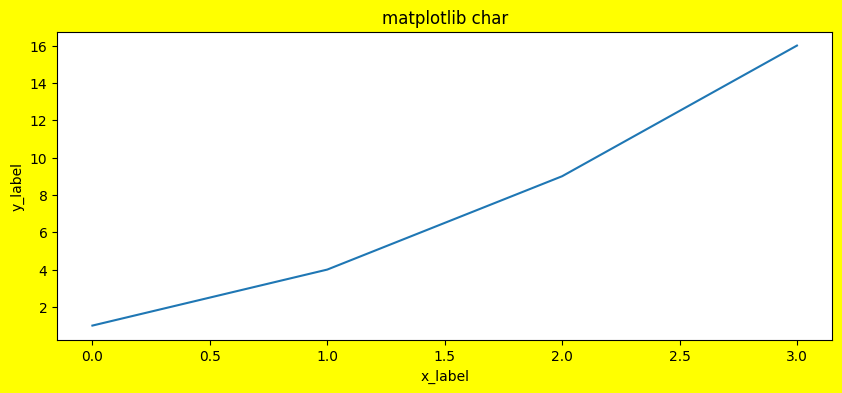

In [31]:
# axes 속성으로 x축, y축 lable, title을 지정
plt.figure(figsize = (10, 4), facecolor='yellow')
plt.plot([0, 1, 2, 3],[1, 4, 9, 16])
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.title('matplotlib char')
plt.show()

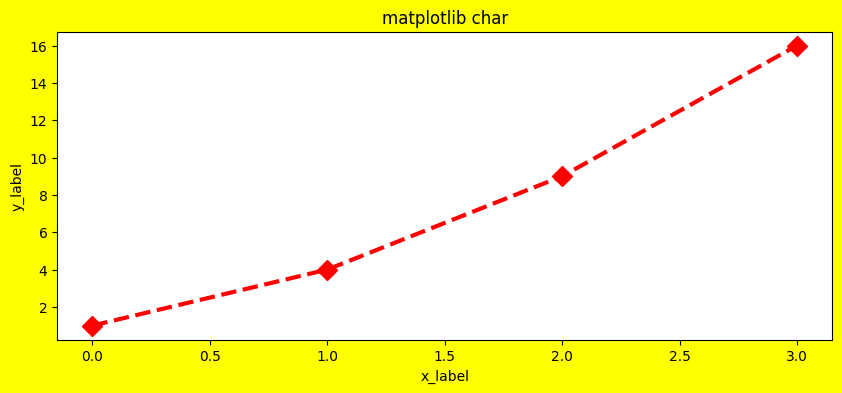

In [32]:
# 다양한 속성 적용이 가능, https://matplotlib.org/stable/api/markers_api.html
plt.figure(figsize = (10, 4), facecolor='yellow')
plt.plot([0, 1, 2, 3],[1, 4, 9, 16], color = 'red', marker = 'D', linestyle = 'dashed', linewidth = 3, markersize = 10)
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.title('matplotlib char')
plt.show()

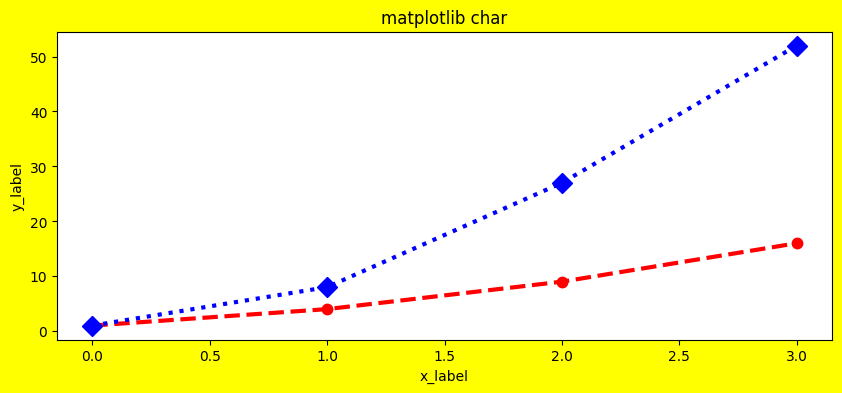

In [33]:
# 범례 적용, 두개 이상의 차트를 한 axes내에 표시
plt.figure(figsize = (10, 4), facecolor='yellow')
plt.plot([0, 1, 2, 3],[1, 4, 9, 16], color = 'red', marker = '.', linestyle = 'dashed', linewidth = 3, markersize = 15)
plt.plot([0, 1, 2, 3],[1, 8, 27, 52], color = 'blue', marker = 'D', linestyle = 'dotted', linewidth = 3, markersize = 10)
plt.xlabel('x_label')
plt.ylabel('y_label')
plt.title('matplotlib char')
plt.show()


## 시각화 matplotlib, seaborn

In [34]:
# 파일 로딩 
df_hk[:5]

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS


In [37]:
# Data type을 살펴보고 EDA를 수행 
df_hk.info()
df_hk.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    250 non-null    object 
 1   social_security_number  250 non-null    object 
 2   gender                  250 non-null    object 
 3   height                  250 non-null    float64
 4   age                     250 non-null    int64  
 5   blood_type              250 non-null    object 
 6   company                 250 non-null    object 
 7   grades                  250 non-null    object 
 8   salary                  250 non-null    int64  
 9   expenditure             250 non-null    int64  
 10  car_type                250 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 21.6+ KB


name                       object
social_security_number     object
gender                     object
height                    float64
age                         int64
blood_type                 object
company                    object
grades                     object
salary                      int64
expenditure                 int64
car_type                   object
dtype: object

## histogram

* histogram은 연속값에 대한 구간별 도수 분포를 시각화


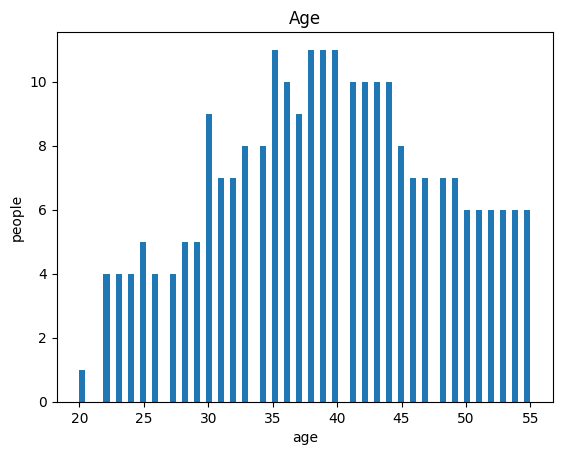

In [38]:
# matplotlib histogram, matplotlib는 x,y축 이름 지정 필요
plt.hist(df_hk['age'], bins = 75)
plt.xlabel('age')
plt.ylabel('people')
plt.title('Age')
plt.show()

<AxesSubplot: ylabel='Frequency'>

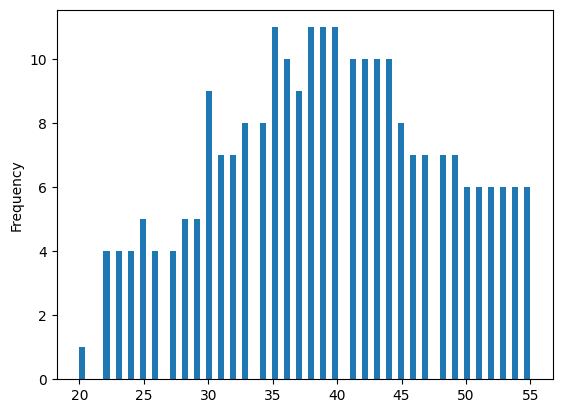

In [39]:
# Pandas 에서도 hist 함수를 바로 호출할 수 있음. 
df_hk['age'].plot.hist(bins=75)


* seaborn의 histogram은 histplot과 displot이 대표적이며 histplot은 axes레벨, displot은 figure레벨임


<AxesSubplot: xlabel='age', ylabel='Count'>

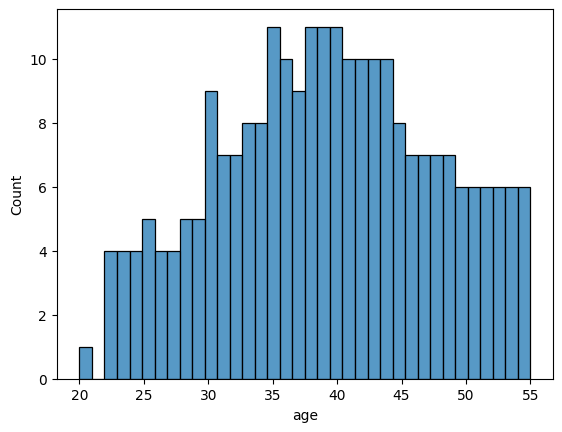

In [40]:
# seaborn histogram histplot
sns.histplot(df_hk['age'], bins=36)

<AxesSubplot: xlabel='age', ylabel='Density'>

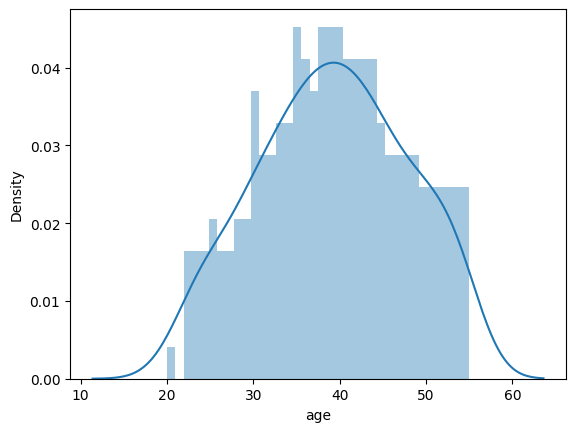

In [41]:
# seaborn histogram distplot
sns.distplot(df_hk['age'], bins=36)

<AxesSubplot: xlabel='age', ylabel='Count'>

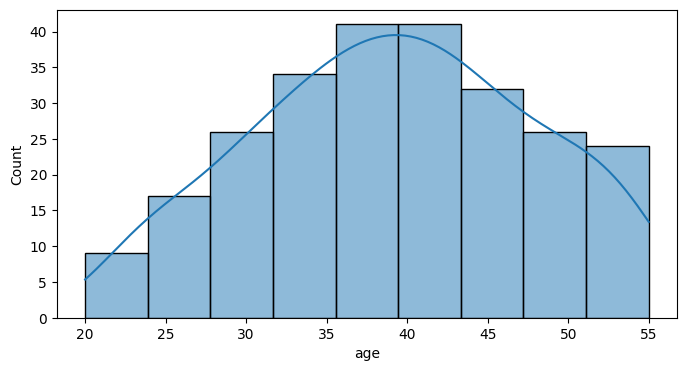

In [42]:
# seaborn histogram canvas의 사이즈 지정

plt.figure(figsize=(8, 4))
sns.histplot(df_hk['age'], kde=True)
# plt.show()

<AxesSubplot: xlabel='age', ylabel='Count'>

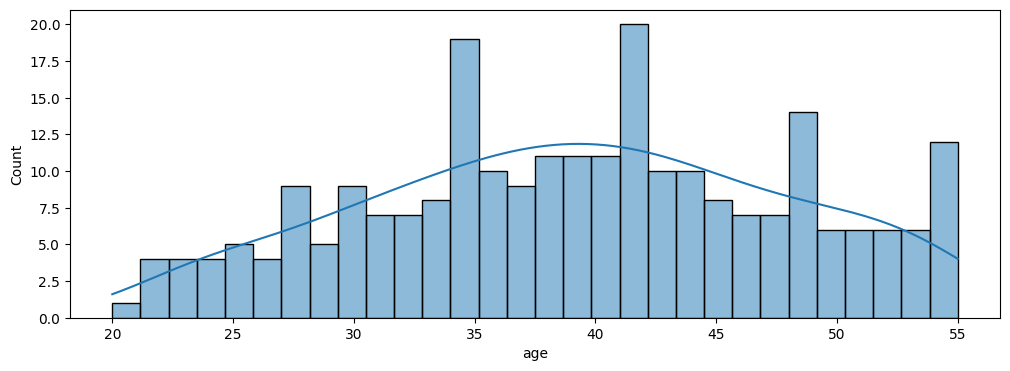

In [43]:
# seaborn histogram bins로 x구간 조정

plt.figure(figsize=(12, 4))
sns.histplot(x='age', data=df_hk, kde=True, bins=30)

## countplot 
* countplot은 범주형에 대한 count 시각화

In [44]:
# 파일 로딩
df_hk[:5]

,name,social_security_number,gender,height,age,blood_type,company,grades,salary,expenditure,car_type
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975,L
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970,m
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905,m
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935,m
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015,SS


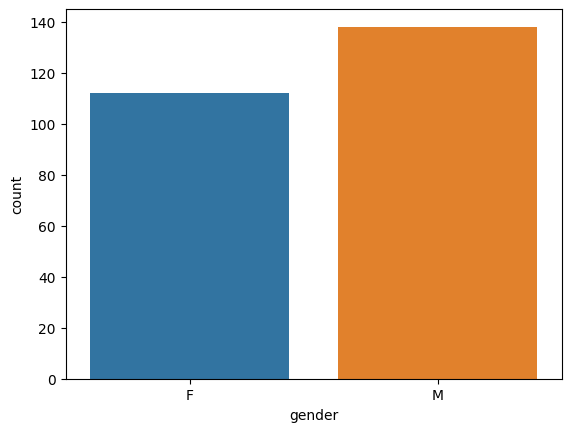

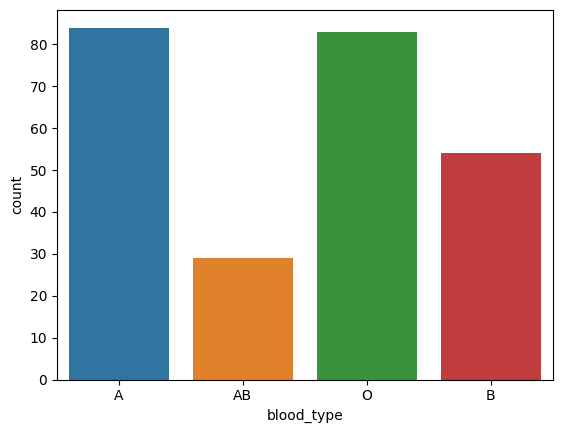

In [45]:
# countplot
sns.countplot(x = 'gender', data = df_hk)
plt.show()
sns.countplot(x = 'blood_type', data = df_hk)
plt.show()

## barplot

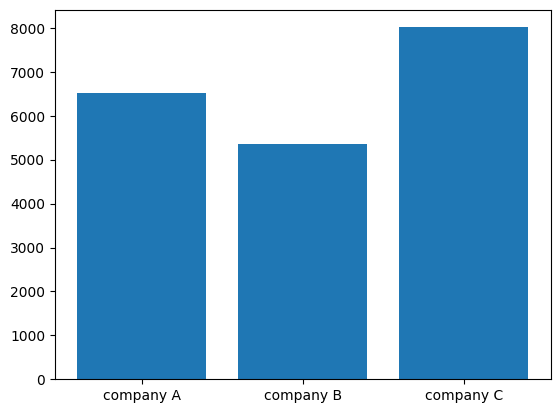

In [46]:
# matplotlib barplot
# bar 값을 만들어야 함

a_mean = df_hk[df_hk['company'] == 'A'].salary.mean()
b_mean = df_hk[df_hk['company'] == 'B'].salary.mean()
c_mean = df_hk[df_hk['company'] == 'C'].salary.mean()
X = df_hk['company'].unique()

plt.bar(x=X, height=[a_mean,b_mean,c_mean])
plt.xticks([0,1,2],['company A','company B','company C']) # plt.xticks([0,1,2] 눈금간격
plt.show()

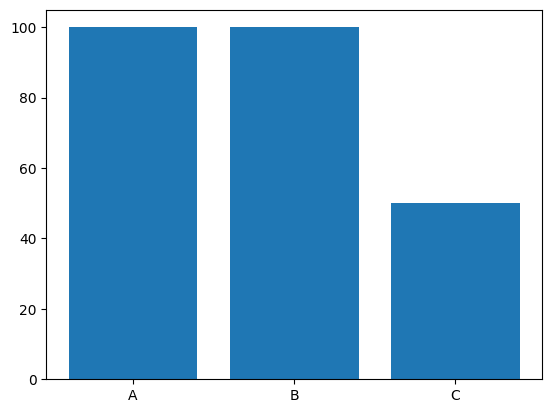

In [47]:
# 개별값 계산

a_count = (df_hk['company'] == 'A').sum()
b_count = (df_hk['company'] == 'B').sum()
c_count = (df_hk['company'] == 'C').sum()

X = df_hk['company'].unique()

plt.bar(x=X, height=[a_count,b_count,c_count])
plt.show()

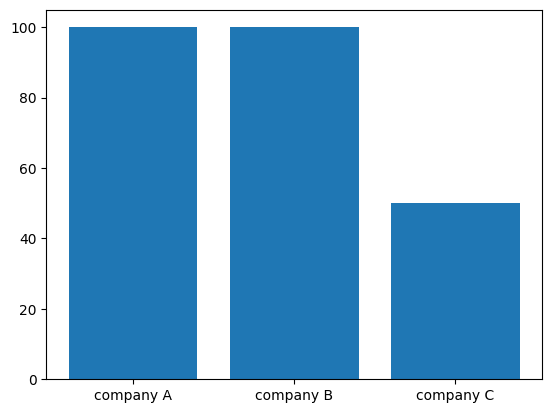

In [48]:
# count_values 사용
count = df_hk['company'].value_counts().tolist()

X = df_hk['company'].unique()
plt.bar(x=X, height=count)
plt.xticks([0,1,2],['company A','company B','company C'])
plt.show()

* seaborn barplot은 범주형에 대한 mean, sum, median 시각화

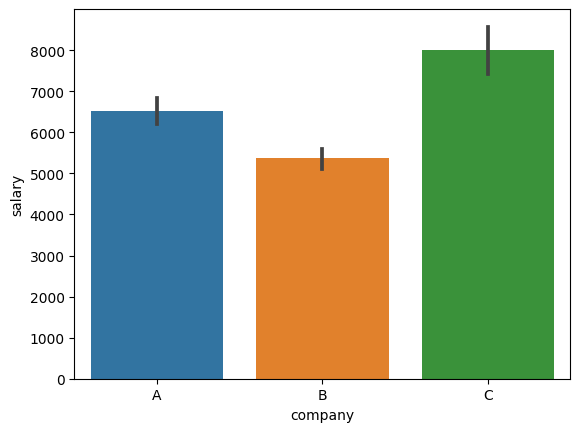

In [49]:
# seaborn barplot y값 default mean으로 계산 (sum, median 변경 가능)
sns.barplot(x = 'company', y = 'salary', data = df_hk)
plt.show()

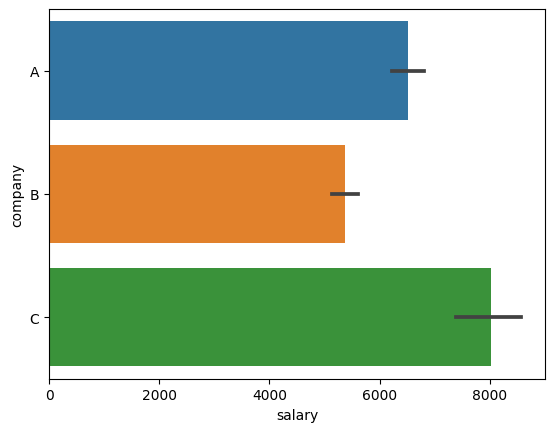

In [50]:
# x, y 변경시 가로형으로 인식하고 출력
sns.barplot(x = 'salary', y = 'company', data = df_hk)
plt.show()

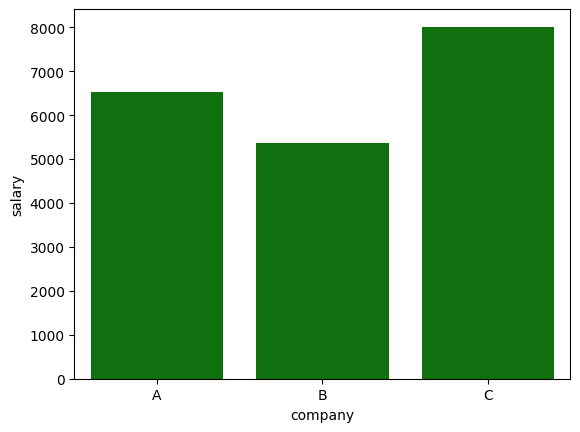

In [51]:
# confidence interval을 없애고, color를 통일.
sns.barplot(x = 'company', y = 'salary', data = df_hk, ci = None, color = 'green')
plt.show()

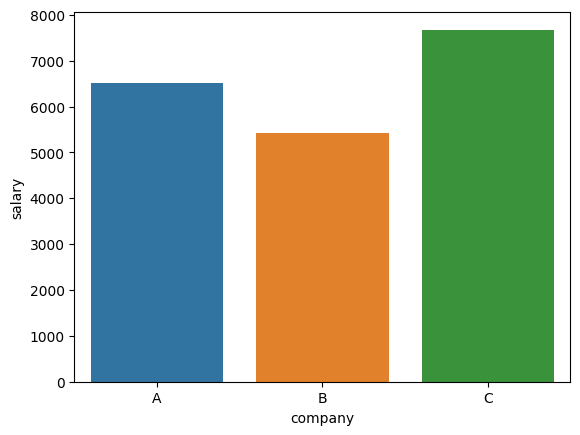

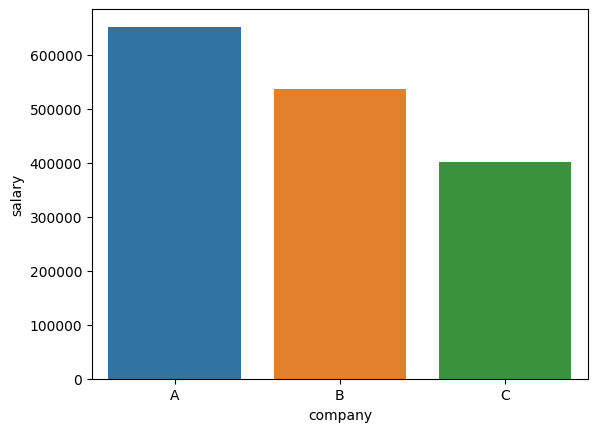

In [52]:
# 평균외에 총합, 중압값으로 표현. estimator= np.median, np.sum
sns.barplot(x = 'company', y = 'salary', data = df_hk, ci = None, estimator=np.median)
plt.show()
sns.barplot(x = 'company', y = 'salary', data = df_hk, ci = None, estimator=np.sum)
plt.show()

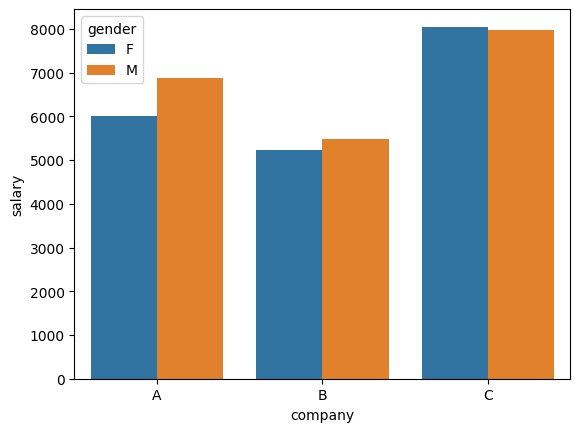

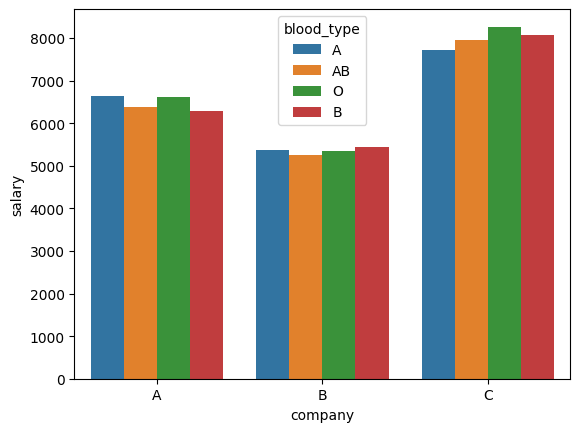

In [53]:
# hue 인자를 사용하여 x값 세분화
sns.barplot(x = 'company', y = 'salary', data = df_hk, ci = None, hue='gender')
plt.show()
sns.barplot(x = 'company', y = 'salary', data = df_hk, ci = None, hue='blood_type')
plt.show()

## box plot
* 4분위를 박스 형태로 **표현**

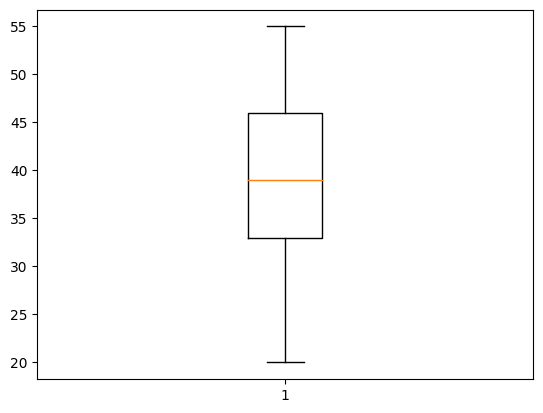

In [54]:
# matplotlib barplot, x(범주형), y(연속형)
plt.boxplot(x = 'age', data = df_hk)
plt.show()

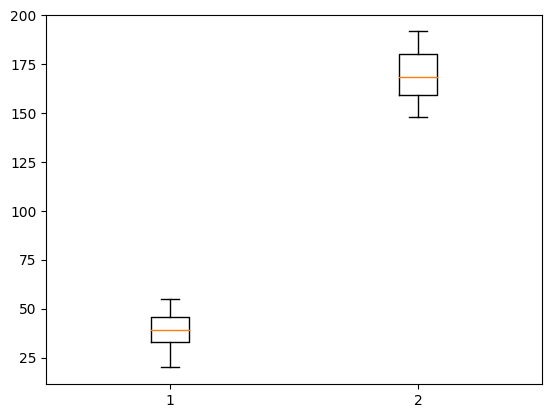

In [55]:
# matplotlib barplot, x(범주형), y(연속형)
plt.boxplot(x = df_hk[['age', 'height']], data = df_hk)
plt.show()

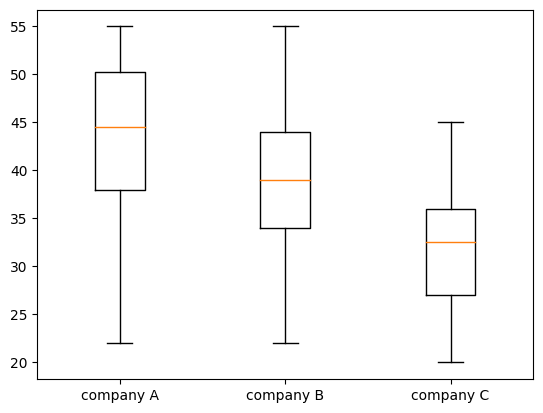

In [56]:
# matplotlib barplot, x(범주형), y(연속형)
a_age = df_hk[df_hk['company'] == 'A'].age
b_age = df_hk[df_hk['company'] == 'B'].age
c_age = df_hk[df_hk['company'] == 'C'].age

plt.boxplot(x = [a_age, b_age, c_age])
plt.xticks([1,2,3],['company A','company B','company C'])
plt.show()

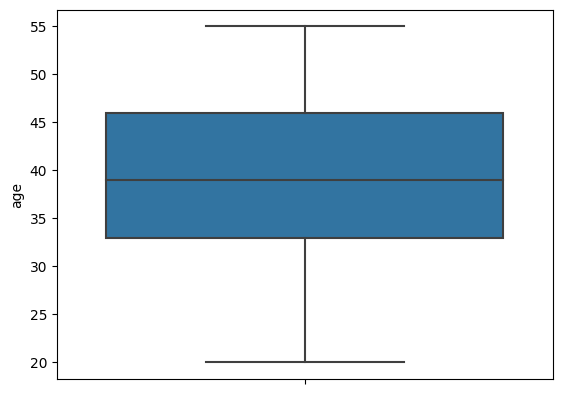

In [57]:
# seaborn barplot, x(범주형), y(연속형)에 대한 4분위값을 표현
sns.boxplot(y= 'age', data=df_hk)
plt.show()

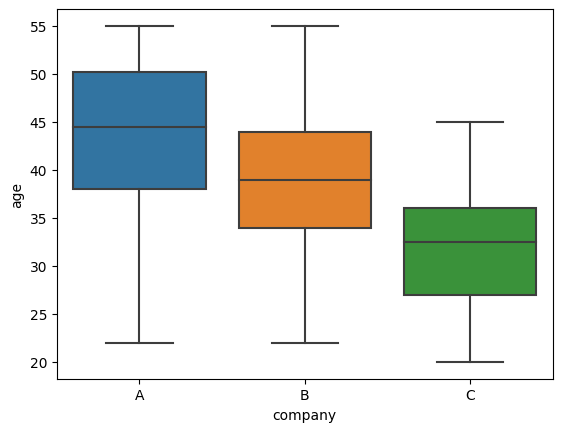

In [58]:
# seaborn barplot, x(범주형), y(연속형)에 대한 4분위값을 표현
sns.boxplot(x='company',y='age', data=df_hk)
plt.show()

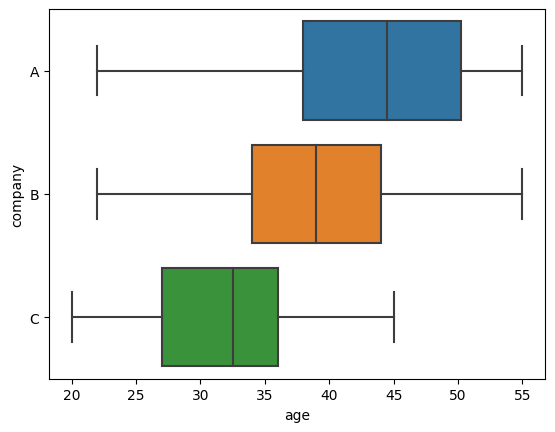

In [59]:
# x(연속형), y(범주형) 입력 data 변경시 가로형으로 인식하고 출력
sns.boxplot(x='age',y='company', data=df_hk)
plt.show()

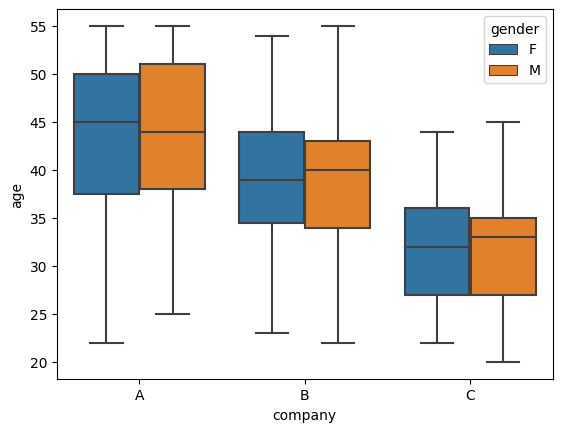

In [60]:
# hue 인자를 사용하여 x값 세분화
sns.boxplot(x='company',y='age', data=df_hk, hue='gender')
plt.show()

## pie chart
* X(범주형)값을 시각화

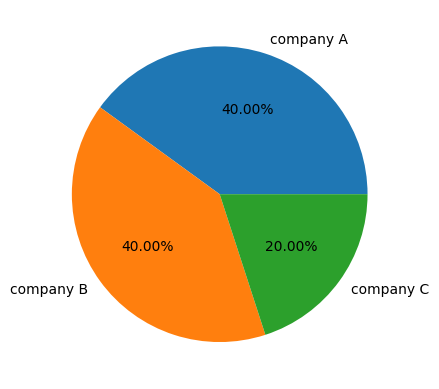

In [61]:
a_count = df_hk[df_hk['company'] == 'A'].company.count()
b_count = df_hk[df_hk['company'] == 'B'].company.count()
c_count = df_hk[df_hk['company'] == 'C'].company.count()

plt.pie(x = ([a_count,b_count,c_count]), 
        labels=(['company A','company B','company C']), autopct='%.2f%%') # autopct 전체 백분율, ' %.2f '는 소숫점 2자리

plt.show()

## scatter plot (산점도)
* 산점도로서 X(연속형), Y(연속형) 값을 시각화

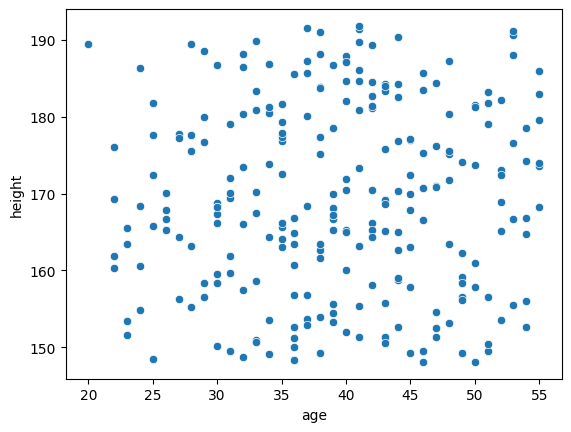

In [62]:
# scatterplot, <AxesSubplot:xlabel='age', ylabel='height'>
sns.scatterplot(x='age', y='height', data=df_hk)
plt.show()

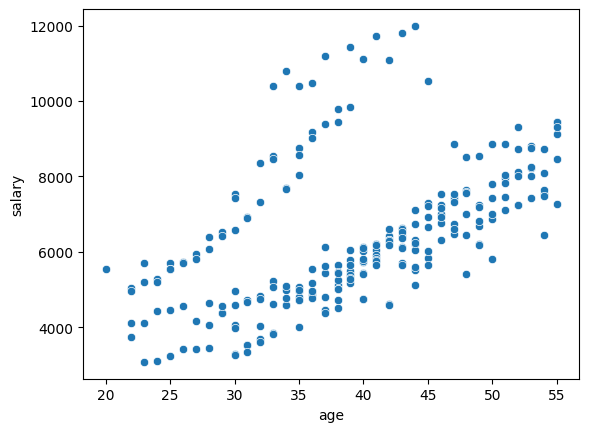

In [63]:
# scatterplot, <AxesSubplot:xlabel='age', ylabel='salary'>
sns.scatterplot(x='age', y='salary', data=df_hk)
plt.show()

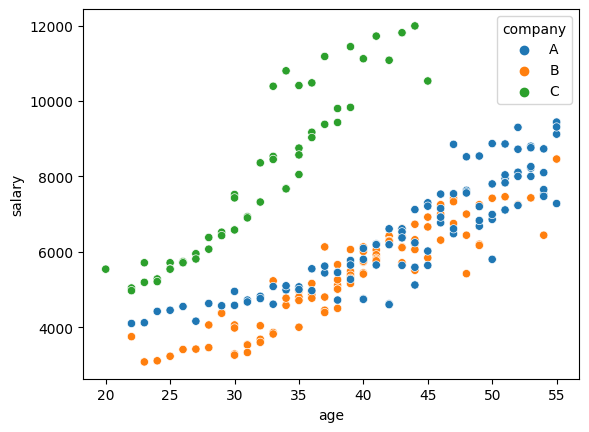

In [64]:
# hue 인자를 사용하여 x값 세분화
sns.scatterplot(x='age', y='salary', data=df_hk, hue='company')
plt.show()

<AxesSubplot: xlabel='age', ylabel='salary'>

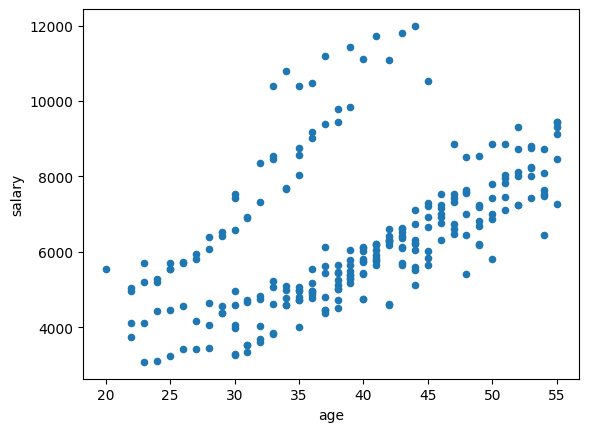

In [67]:
df_hk.plot.scatter(x = 'age', y = 'salary')

## 상관 Heatmap
* 컬럼간의 상관도를 Heatmap형태로 표현

In [68]:
# corr() -> 연속형 데이터의 상관계수 출력
df_hk.corr()

,height,age,salary,expenditure
height,1.000000,0.040403,0.048673,0.048044
age,0.040403,1.000000,0.525035,0.552832
salary,0.048673,0.525035,1.000000,0.972185
expenditure,0.048044,0.552832,0.972185,1.000000


<AxesSubplot: >

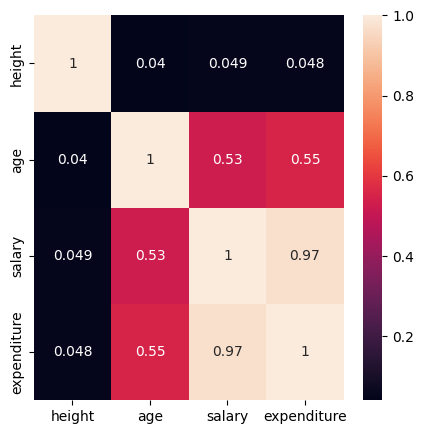

In [69]:
# 상관 Heatmap

plt.figure(figsize=(5, 5))

corr = df_hk.corr()
sns.heatmap(corr, annot=True)
# DataFrame의 corr()은 숫자형 값만 상관도를 구함. 


In [ ]:
# annotation(주석) 인자로 상관계수 표시


## Quiz

1) bike temp에 대한 histogram을 그리시오

2) iris species별 sepal_length 평균의 bar chart를 그리시오

3) diamond cut별 price에 대한 boxplot을 그리시오

4) diamond cut별 price에 대한 scatter plot을 그리시오 (hue = 'color' or 'cut' 적용)